<a href="https://colab.research.google.com/github/mgovindasamy/Machine-Learning-Examples/blob/master/daily_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mgovindasamy/Machine-Learning-Examples/master/day_product_purchase.csv')

In [6]:
df['Daily']=pd.to_datetime(df['CREATION_DATE'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CREATION_DATE     5610 non-null   object        
 1   PAYMENT_IN_USD    5610 non-null   int64         
 2   Transaction_Type  5610 non-null   object        
 3   Daily             5610 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 175.4+ KB


In [15]:
df.head()

,CREATION_DATE,PAYMENT_IN_USD,Transaction_Type,Daily
0,2006-11-04 00:00:00,0,product purchase,2006-11-04
1,2006-11-05 00:00:00,0,product purchase,2006-11-05
2,2006-11-06 00:00:00,7,product purchase,2006-11-06
3,2006-11-07 00:00:00,0,product purchase,2006-11-07
4,2006-11-08 00:00:00,15,product purchase,2006-11-08


In [18]:
fig = px.line(df, x='Daily', y='PAYMENT_IN_USD', title='Sales')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [20]:
from fbprophet import Prophet

In [23]:
sales_df=df[['Daily','PAYMENT_IN_USD']].rename({'Daily':'ds','PAYMENT_IN_USD':'y'}, axis='columns')

In [25]:
sales_df

,ds,y
0,2006-11-04,0
1,2006-11-05,0
2,2006-11-06,7
3,2006-11-07,0
4,2006-11-08,15
...,...,...
5605,2022-03-23,49911103
5606,2022-03-24,43673446
5607,2022-03-25,53060683
5608,2022-03-26,57454508


In [28]:
train=sales_df[(sales_df['ds'] >= '2006-11-04	') & (sales_df['ds'] <= '2019-03-31')]
test=sales_df[(sales_df['ds'] > '2019-03-31')]

In [29]:
train.shape

(4518, 2)

In [30]:
test.shape

(1092, 2)

In [36]:
m = Prophet(interval_width=0.95)

In [37]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods=40, freq='D')
future.tail()

,ds
4553,2019-05-06
4554,2019-05-07
4555,2019-05-08
4556,2019-05-09
4557,2019-05-10


In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4553,2019-05-06,3.383859e+07,2.586668e+07,4.111367e+07
4554,2019-05-07,3.407945e+07,2.697432e+07,4.149632e+07
4555,2019-05-08,3.406008e+07,2.628351e+07,4.145874e+07
4556,2019-05-09,3.460317e+07,2.725685e+07,4.265976e+07
4557,2019-05-10,3.612512e+07,2.811835e+07,4.379030e+07


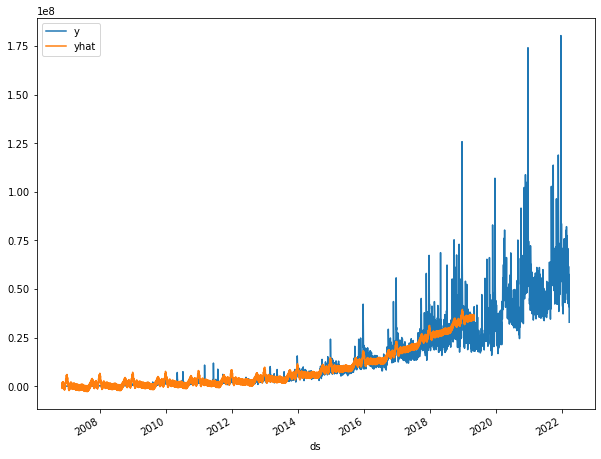

In [40]:
pd.concat([sales_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

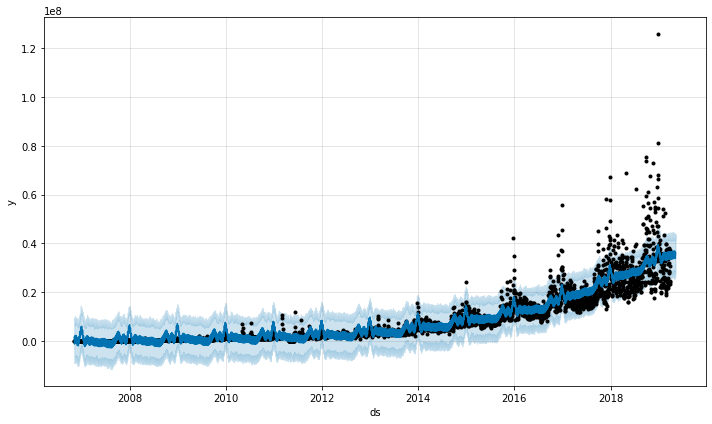

In [41]:
fig1 = m.plot(forecast)

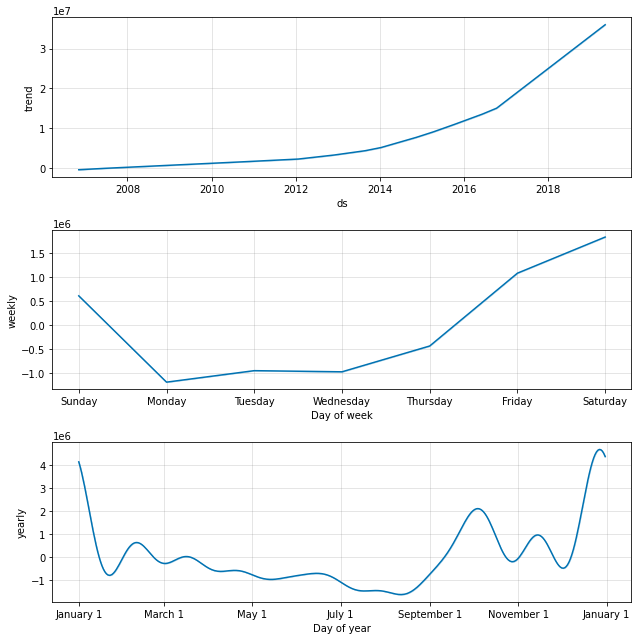

In [42]:
fig2 = m.plot_components(forecast)

In [44]:
holiday_sale = pd.DataFrame({
  'holiday': 'dec_jan_sale',
  'ds': pd.to_datetime(['	2019-12-25', '2018-12-25', '2017-12-25', '2016-12-25',
                        '2015-12-25', '2014-12-25','2013-12-25','2012-12-25','2011-12-25','2010-12-25','2009-12-25','2008-12-25','2007-12-25',
                        '2006-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

In [50]:
m2 = Prophet(interval_width=0.95, seasonality_mode='multiplicative', holidays=holiday_sale)

In [51]:
m2.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
forecast = m2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4553,2019-05-06,2.683656e+07,2.084439e+07,3.277451e+07
4554,2019-05-07,2.722195e+07,2.146216e+07,3.293916e+07
4555,2019-05-08,2.701073e+07,2.144780e+07,3.288814e+07
4556,2019-05-09,2.997373e+07,2.466633e+07,3.572080e+07
4557,2019-05-10,3.745928e+07,3.118671e+07,4.300092e+07


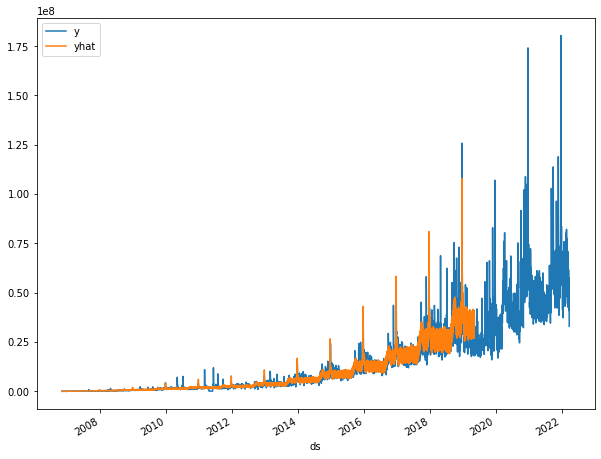

In [57]:
pd.concat([sales_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

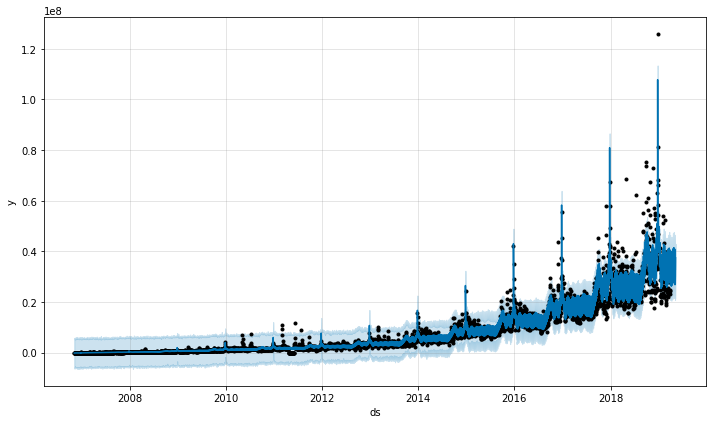

In [59]:
fig1 = m2.plot(forecast)

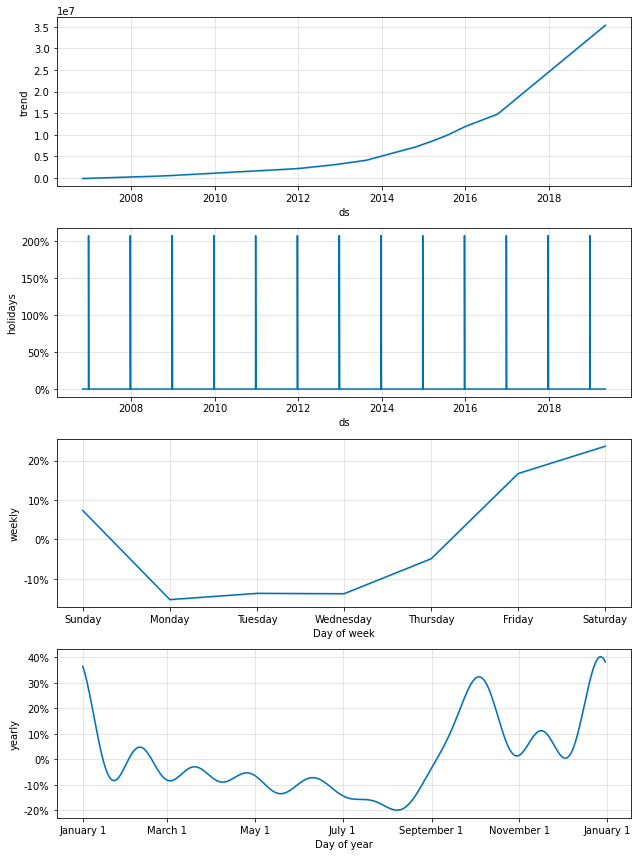

In [60]:
fig2 = m2.plot_components(forecast)